In [378]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
csv_files = [file for file in os.listdir() if file.endswith('csv')]

In [6]:
df_list = []

for file in csv_files:
    df_list.append(pd.read_csv(file))

In [7]:
csv_files

['crop_rotation.csv',
 'gross_nutrient_balance.csv',
 'irrigation.csv',
 'legal_form.csv',
 'pesticides.csv',
 'precipitation.csv',
 'soil_erosion.csv',
 'temperature.csv',
 'tenure_status.csv',
 'training.csv',
 'yields.csv']

In [17]:
eu27_codes = ['AT', 'BE', 'BG', 'HR', 'CY', 'CZ', 'DK', 'EE', 'FI', 'FR', 'DE', 'EL', 'HU', 'IE', 'IT', 'LV', 'LT',
              'LU', 'MT', 'NL', 'PL', 'PT', 'RO', 'SK', 'SI', 'ES', 'SE']

In [13]:
# Let's examine crop_rotation
df_list[0].head()

,Unnamed: 0,freq,crop_rot,tillage,farmtype,agrarea,unit,geo\TIME_PERIOD,2010,2016
0,2503,A,NAP,ARA,FT16_SO,TOTAL,HA,AT,NaN,0.0
1,2504,A,NAP,ARA,FT16_SO,TOTAL,HA,AT11,NaN,0.0
2,2505,A,NAP,ARA,FT16_SO,TOTAL,HA,AT12,NaN,0.0
3,2506,A,NAP,ARA,FT16_SO,TOTAL,HA,AT13,NaN,0.0
4,2507,A,NAP,ARA,FT16_SO,TOTAL,HA,AT21,NaN,0.0


In [53]:
crop_rotation_df = df_list[0]

In [54]:
def rename_filter_drop(df, old_col_name, new_col_name, filter_var, filter_val, cols_to_drop):
    """
    Renames a column in a DataFrame, filters for specific values of another column and drops a list of columns.
    
    Paramters:
    df (pandas DataFrame): The DataFrame to operate on
    old_col_name (str): The column name which is to be changed
    new_col_name (str): The new column name to be used
    filter_var (str): The variable which is to be filtered
    filter_val (list): The values to be filtered for
    cols_to_drop (list): The columns to be dropped
    
    """
    
    df = df.rename(columns = {old_col_name: new_col_name})
    df = df[df[filter_var].isin(filter_val)]
    df = df.drop(columns = cols_to_drop)
    return df

In [55]:
crop_rotation_df = rename_filter_drop(crop_rotation_df, 'geo\TIME_PERIOD', 'geo', 'geo', eu27_codes, 
                                      ['Unnamed: 0', 'freq', 'agrarea'])

In [56]:
crop_rotation_df.head()

,crop_rot,tillage,farmtype,unit,geo,2010,2016
0,NAP,ARA,FT16_SO,HA,AT,NaN,0.0
10,NAP,ARA,FT16_SO,HA,BE,NaN,0.0
22,NAP,ARA,FT16_SO,HA,BG,NaN,0.0
29,NAP,ARA,FT16_SO,HA,CZ,NaN,0.0
36,NAP,ARA,FT16_SO,HA,DE,NaN,0.0


In [52]:
crop_rotation_df.agrarea.unique()

array(['TOTAL'], dtype=object)

In [59]:
crop_rotation_df_long = crop_rotation_df.melt(id_vars = ['crop_rot', 'tillage', 'farmtype', 'unit', 'geo'], 
                                              value_vars = ['2010', '2016'], var_name = 'Year')

In [60]:
crop_rotation_df_long.head()

,crop_rot,tillage,farmtype,unit,geo,Year,value
0,NAP,ARA,FT16_SO,HA,AT,2010,NaN
1,NAP,ARA,FT16_SO,HA,BE,2010,NaN
2,NAP,ARA,FT16_SO,HA,BG,2010,NaN
3,NAP,ARA,FT16_SO,HA,CZ,2010,NaN
4,NAP,ARA,FT16_SO,HA,DE,2010,NaN


In [71]:
# Seen as this doesn't seem to be working, I could filter for the group and then use the tried and tested way

def grouped_null_counts(df, group):
    df = df.groupby(group).apply(lambda x: x.isnull().sum() / x.size)
    return df

In [120]:
# There's only 2010 data for the TOTAL crop_rot but the below doesn't seem to suggest that

null_counts_crop_rot = grouped_null_counts(crop_rotation_df_long, 'crop_rot')
null_counts_geo = grouped_null_counts(crop_rotation_df_long, 'geo')
null_counts_year = grouped_null_counts(crop_rotation_df_long, 'Year')
print(null_counts_crop_rot)
print(null_counts_geo)
print(null_counts_year)

          crop_rot  tillage  farmtype  unit  geo  Year     value
crop_rot                                                        
NAP            0.0      0.0       0.0   0.0  0.0   0.0  0.075000
PC0            0.0      0.0       0.0   0.0  0.0   0.0  0.075000
PC1-24         0.0      0.0       0.0   0.0  0.0   0.0  0.074830
PC25-49        0.0      0.0       0.0   0.0  0.0   0.0  0.077922
PC50-74        0.0      0.0       0.0   0.0  0.0   0.0  0.074675
PC_GE75        0.0      0.0       0.0   0.0  0.0   0.0  0.071429
TOTAL          0.0      0.0       0.0   0.0  0.0   0.0  0.034161
     crop_rot  tillage  farmtype  unit  geo  Year     value
geo                                                        
AT        0.0      0.0       0.0   0.0  0.0   0.0  0.061224
BE        0.0      0.0       0.0   0.0  0.0   0.0  0.071429
BG        0.0      0.0       0.0   0.0  0.0   0.0  0.061224
CY        0.0      0.0       0.0   0.0  0.0   0.0  0.071429
CZ        0.0      0.0       0.0   0.0  0.0   0.0  0.06

In [149]:
crop_rotation_df_long[crop_rotation_df_long.Year == '2010'].value.isnull().sum() / len(crop_rotation_df_long[crop_rotation_df_long.Year == '2010'].value)

0.92

In [79]:
null_values = crop_rotation_df_long[crop_rotation_df_long.value.isnull()]
null_values

,crop_rot,tillage,farmtype,unit,geo,Year,value
0,NAP,ARA,FT16_SO,HA,AT,2010,NaN
1,NAP,ARA,FT16_SO,HA,BE,2010,NaN
2,NAP,ARA,FT16_SO,HA,BG,2010,NaN
3,NAP,ARA,FT16_SO,HA,CZ,2010,NaN
4,NAP,ARA,FT16_SO,HA,DE,2010,NaN
...,...,...,...,...,...,...,...
189,PC0,ARA,FT16_SO,HA,SK,2016,NaN
204,PC1-24,ARA,FT16_SO,HA,LU,2016,NaN
225,PC25-49,ARA,FT16_SO,HA,LU,2016,NaN
232,PC25-49,ARA,FT16_SO,HA,SK,2016,NaN


In [61]:
crop_rotation_total = crop_rotation_df_long[crop_rotation_df_long.crop_rot == 'TOTAL']

In [62]:
crop_rotation_total.head()

,crop_rot,tillage,farmtype,unit,geo,Year,value
127,TOTAL,ARA,FT16_SO,HA,AT,2010,265360.0
128,TOTAL,ARA,FT16_SO,HA,BE,2010,NaN
129,TOTAL,ARA,FT16_SO,HA,BG,2010,204310.0
130,TOTAL,ARA,FT16_SO,HA,CY,2010,NaN
131,TOTAL,ARA,FT16_SO,HA,CZ,2010,278910.0


In [82]:
crop_rot_join = pd.merge(crop_rotation_df_long, crop_rotation_total, on = ['tillage', 'farmtype', 'unit', 'geo', 'Year'], 
                         how = 'left', suffixes = ('', '_total'))

In [83]:
crop_rot_join.head()

,crop_rot,tillage,farmtype,unit,geo,Year,value,crop_rot_total,value_total
0,NAP,ARA,FT16_SO,HA,AT,2010,NaN,TOTAL,265360.0
1,NAP,ARA,FT16_SO,HA,BE,2010,NaN,TOTAL,NaN
2,NAP,ARA,FT16_SO,HA,BG,2010,NaN,TOTAL,204310.0
3,NAP,ARA,FT16_SO,HA,CZ,2010,NaN,TOTAL,278910.0
4,NAP,ARA,FT16_SO,HA,DE,2010,NaN,TOTAL,NaN


In [84]:
crop_rot_join['share'] = crop_rot_join.value/crop_rot_join.value_total * 100

In [90]:
crop_rot_join.head()

,crop_rot,tillage,farmtype,unit,geo,Year,value,crop_rot_total,value_total,share
0,NAP,ARA,FT16_SO,HA,AT,2010,NaN,TOTAL,265360.0,NaN
1,NAP,ARA,FT16_SO,HA,BE,2010,NaN,TOTAL,NaN,NaN
2,NAP,ARA,FT16_SO,HA,BG,2010,NaN,TOTAL,204310.0,NaN
3,NAP,ARA,FT16_SO,HA,CZ,2010,NaN,TOTAL,278910.0,NaN
4,NAP,ARA,FT16_SO,HA,DE,2010,NaN,TOTAL,NaN,NaN


In [102]:
crop_rot_join_graph = crop_rot_join[crop_rot_join.crop_rot != 'TOTAL']

In [104]:
crop_rot_join_graph.crop_rot.unique()

array(['NAP', 'PC0', 'PC1-24', 'PC25-49', 'PC50-74', 'PC_GE75'],
      dtype=object)

C:\Users\justi\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


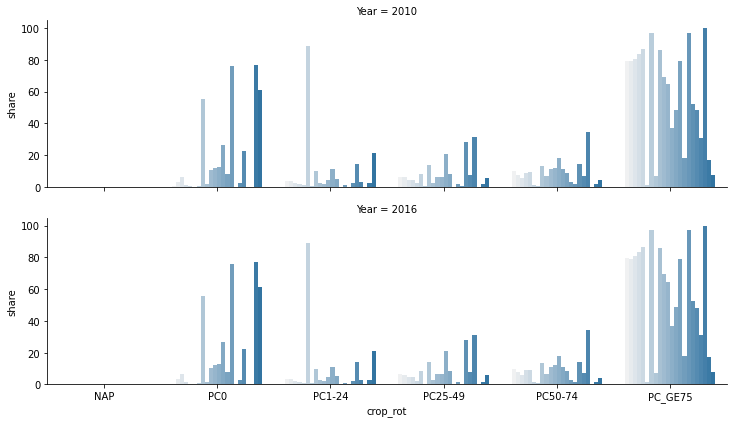

In [106]:

crop_rot_join_graph = crop_rot_join[crop_rot_join.crop_rot != 'TOTAL']

g = sns.FacetGrid(crop_rot_join_graph, row = 'Year')

g.map(sns.barplot, x = crop_rot_join_graph.crop_rot, y = crop_rot_join_graph.share, hue = crop_rot_join_graph.geo)

g.fig.set_size_inches(14, 6)

plt.show()

In [122]:
#crop_rot_join_graph_2010.to_csv('check.csv')
#crop_rot_join_graph.to_csv('check2.csv')
crop_rotation_df_long.to_csv('check3.csv')

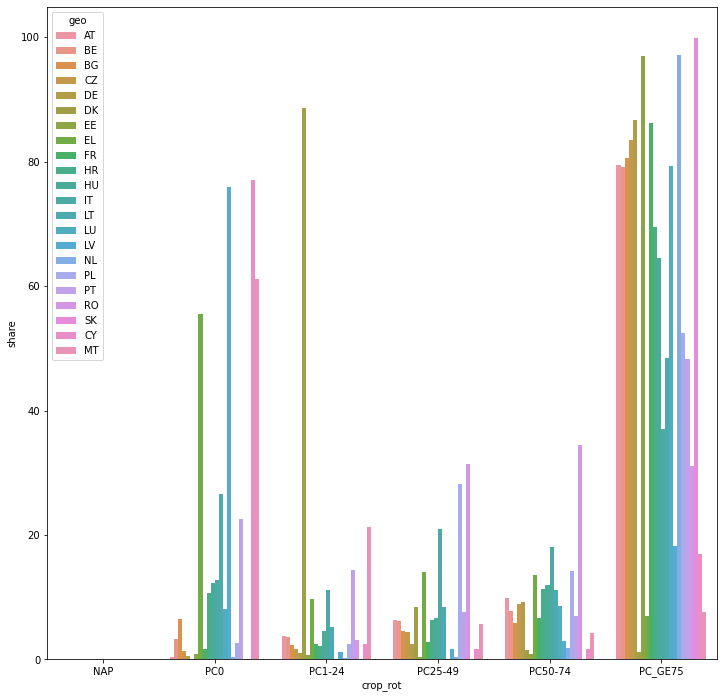

In [131]:
# The data appears to be almost identical between the two years, let's take a closer look by only considering 2010
# Correction there isn't really any data for 2010, not sure why we get the above graph

crop_rot_join_graph_2016 = crop_rot_join_graph[crop_rot_join_graph.Year == '2016']

fig, ax = plt.subplots(figsize = (12, 12))

sns.barplot(data = crop_rot_join_graph_2016, x = crop_rot_join_graph_2016.crop_rot, y = crop_rot_join_graph_2016.share,
           hue = crop_rot_join_graph_2016.geo, ax = ax)



plt.show()

In [144]:
# From the graph above, there are only 0 values for NAP so let's remove them
# I also want to pivot by crop rotation
# from visual inspection of the data, values of NaN are actually 0 values
# I know this because I've calcualated shares and the values add up 100% if I replace NaN with 0
# As I only have values for 1 year, I want to treat this data as a categorical variable rather than numerical
# I adjust for that below

def categorical_converter(x):
    if x < 20:
        return 'very low'
    elif 20 <= x < 40:
        return 'low'
    elif 40 <= x < 60:
        return 'medium'
    elif 60 <= x < 80:
        return 'high'
    else:
        return 'very high'

crop_rot_clean = crop_rot_join_graph_2016[crop_rot_join_graph_2016.crop_rot != 'NAP'] \
                    .pivot(index = ['tillage', 'farmtype', 'unit', 'geo'], columns = 'crop_rot', values = 'share') \
                    .reset_index() \
                    .fillna(0)

for col in crop_rot_clean.select_dtypes(include = ['int', 'float']).columns:
    crop_rot_clean[col] = crop_rot_clean[col].apply(categorical_converter)



In [150]:
crop_rot_clean.head()

crop_rot,tillage,farmtype,unit,geo,PC0,PC1-24,PC25-49,PC50-74,PC_GE75
0,ARA,FT16_SO,HA,AT,very low,very low,very low,very low,high
1,ARA,FT16_SO,HA,BE,very low,very low,very low,very low,high
2,ARA,FT16_SO,HA,BG,very low,very low,very low,very low,very high
3,ARA,FT16_SO,HA,CY,high,very low,very low,very low,very low
4,ARA,FT16_SO,HA,CZ,very low,very low,very low,very low,very high


In [151]:
# Moving onto gross nutrient balance

df_list[1].head()

,Unnamed: 0,freq,nutrient,indic_ag,geo\TIME_PERIOD,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,A,N,BAL,AT,178458.0,166581.0,154038.0,154390.0,146568.0,...,101664.7,101889.6,95485.9,125087.3,80686.1,121257.8,77552.8,118011.2,121734.8,90473.8
1,1,A,N,BAL,BE,NaN,NaN,NaN,NaN,NaN,...,192787.6,191515.9,190844.7,184567.8,175550.1,175550.0,NaN,NaN,NaN,NaN
2,2,A,N,BAL,BG,NaN,NaN,NaN,742514.0,608229.0,...,71741.0,60296.9,123980.7,78959.4,137486.8,137487.0,357189.5,331185.0,310857.8,144975.2
3,3,A,N,BAL,CH,NaN,NaN,NaN,NaN,NaN,...,104784.8,89503.5,91809.3,104265.8,98547.5,104978.9,105642.2,92871.2,101459.8,89579.8
4,4,A,N,BAL,CY,NaN,NaN,NaN,NaN,NaN,...,21975.8,23027.4,21384.0,19127.3,20792.7,20793.0,NaN,NaN,NaN,NaN


In [153]:
nut_bal_df = df_list[1]

In [156]:
nut_bal_df.columns

Index(['Unnamed: 0', 'freq', 'nutrient', 'indic_ag', 'geo\TIME_PERIOD', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [157]:
nut_bal_df = rename_filter_drop(nut_bal_df, 'geo\TIME_PERIOD', 'geo', 'geo', eu27_codes, ['Unnamed: 0', 'freq'])

In [159]:
nut_bal_df_long = nut_bal_df.melt(id_vars = ['nutrient', 'indic_ag', 'geo'], var_name = 'Year')

In [160]:
nut_bal_df_long.head()

,nutrient,indic_ag,geo,Year,value
0,N,BAL,AT,1985,178458.0
1,N,BAL,BE,1985,NaN
2,N,BAL,BG,1985,NaN
3,N,BAL,CY,1985,NaN
4,N,BAL,CZ,1985,454385.0


In [163]:
def null_share(df):
    df = df.isnull().sum() / len(df) * 100
    return df
    

In [164]:
null_share(nut_bal_df_long)

nutrient     0.000000
indic_ag     0.000000
geo          0.000000
Year         0.000000
value       24.032578
dtype: float64

In [191]:
grouped_null_counts(nut_bal_df_long, 'Year')

,nutrient,indic_ag,geo,Year,value
Year,,,,,
1985,0.0,0.0,0.0,0.0,0.166821
1986,0.0,0.0,0.0,0.0,0.166821
1987,0.0,0.0,0.0,0.0,0.166821
1988,0.0,0.0,0.0,0.0,0.159836
1989,0.0,0.0,0.0,0.0,0.159836
1990,0.0,0.0,0.0,0.0,0.053621
1991,0.0,0.0,0.0,0.0,0.049512
1992,0.0,0.0,0.0,0.0,0.045917
1993,0.0,0.0,0.0,0.0,0.045917


,nutrient,indic_ag,geo,Year,value
nutrient,,,,,
N,0.0,0.0,0.0,0.0,0.0
P,0.0,0.0,0.0,0.0,0.0


In [ ]:
# A lot of values from the 80s are null but these are no use to me anyway since the fertility data doesn't go back that far
# I'll remove these
# There are very few other missing values so I'll simply fill these with 'ffill' seen as there are some missing values in 2019
# So 'bfill' might not produce a value for the 2019 values

In [192]:
nut_bal_df_long = nut_bal_df_long[nut_bal_df_long.Year >= '1990'].fillna(method = 'ffill')

In [193]:
null_share(nut_bal_df_long)

nutrient    0.0
indic_ag    0.0
geo         0.0
Year        0.0
value       0.0
dtype: float64

In [196]:
nut_bal_group = nut_bal_df_long.groupby(['nutrient', 'indic_ag', 'geo']).mean().reset_index()

In [197]:
nut_bal_group.head()

,nutrient,indic_ag,geo,value
0,N,BAL,AT,128322.850000
1,N,BAL,BE,234462.466667
2,N,BAL,BG,194518.560000
3,N,BAL,CY,60074.126667
4,N,BAL,CZ,273372.450000


In [219]:
nut_bal_group_graph = nut_bal_group[nut_bal_group.indic_ag.isin(['BAL_UAA', 'INP_UAA', 'OUT_UAA'])]

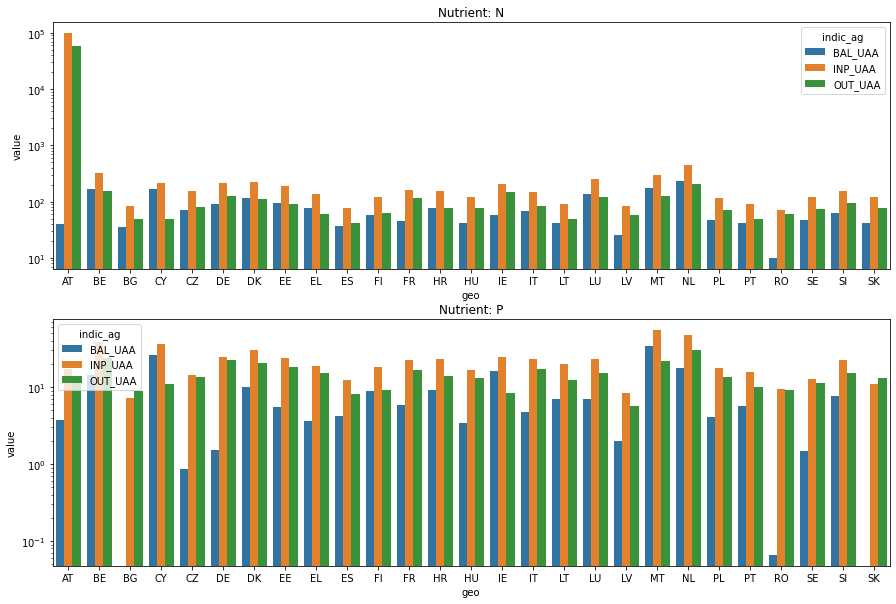

In [227]:
f, ax = plt.subplots(2, 1, figsize = (15, 10))

for i, nutrient in enumerate(nut_bal_group_graph.nutrient.unique()):
    
    nut_bal_graph = nut_bal_group_graph[nut_bal_group_graph['nutrient'] == nutrient]
    
    sns.barplot(x = 'geo', y = 'value', hue = 'indic_ag', data = nut_bal_graph, ax = ax[i])
    
    ax[i].set_yscale('log')
    ax[i].set_title(f'Nutrient: {nutrient}')


In [228]:
nut_bal_group_graph.head()

,nutrient,indic_ag,geo,value
81,N,BAL_UAA,AT,40.273333
82,N,BAL_UAA,BE,165.840000
83,N,BAL_UAA,BG,35.066667
84,N,BAL_UAA,CY,171.020000
85,N,BAL_UAA,CZ,72.013333


In [242]:
nut_bal_N = nut_bal_group_graph[nut_bal_group_graph.nutrient == 'N'] \
                        .pivot(index = ['nutrient', 'geo'], columns = 'indic_ag', values = 'value').reset_index()

In [246]:
nut_bal_P = nut_bal_group_graph[nut_bal_group_graph.nutrient == 'P'] \
                        .pivot(index = ['nutrient', 'geo'], columns = 'indic_ag', values = 'value').reset_index()

In [250]:
len(nut_bal_P)

27

In [261]:
nut_bal_clean = pd.merge(nut_bal_N, nut_bal_P, on = 'geo', how = 'inner', suffixes = ('_N', '_P')) \
                  .drop(columns = ['nutrient_N', 'nutrient_P'])

In [262]:
nut_bal_clean.head()

indic_ag,geo,BAL_UAA_N,INP_UAA_N,OUT_UAA_N,BAL_UAA_P,INP_UAA_P,OUT_UAA_P
0,AT,40.273333,97407.473333,58466.133333,3.743333,17.276667,13.610000
1,BE,165.840000,318.633333,155.680000,14.513333,38.543333,24.253333
2,BG,35.066667,83.843333,48.226667,-2.056667,7.163333,9.036667
3,CY,171.020000,214.896667,48.860000,25.910000,35.863333,11.070000
4,CZ,72.013333,153.620000,81.606667,0.856667,14.336667,13.526667


In [ ]:
# Moving onto irrigation

In [264]:
irrigation_df = df_list[2]

In [265]:
irrigation_df.head()

,Unnamed: 0,freq,irr_area,so_eur,agrarea,unit,geo\TIME_PERIOD,2013,2016
0,63720,A,UAAIB,TOTAL,TOTAL,HA,AT,119840.0,99750.0
1,63721,A,UAAIB,TOTAL,TOTAL,HA,AT11,26640.0,22610.0
2,63722,A,UAAIB,TOTAL,TOTAL,HA,AT12,80760.0,63570.0
3,63723,A,UAAIB,TOTAL,TOTAL,HA,AT13,2210.0,2180.0
4,63724,A,UAAIB,TOTAL,TOTAL,HA,AT21,1250.0,1350.0


In [267]:
irrigation_df = rename_filter_drop(irrigation_df, 'geo\TIME_PERIOD', 'geo', 'geo', eu27_codes, ['Unnamed: 0', 'freq'])

In [268]:
irrigation_df.head()

,irr_area,so_eur,agrarea,unit,geo,2013,2016
0,UAAIB,TOTAL,TOTAL,HA,AT,119840.0,99750.0
10,UAAIB,TOTAL,TOTAL,HA,BE,19180.0,24110.0
22,UAAIB,TOTAL,TOTAL,HA,BG,115520.0,136350.0
29,UAAIB,TOTAL,TOTAL,HA,CY,38060.0,38140.0
31,UAAIB,TOTAL,TOTAL,HA,CZ,34070.0,45850.0


In [275]:
irrigation_df_long = irrigation_df.melt(id_vars = ['irr_area', 'geo'], var_name = 'Year', value_vars = ['2013', '2016'])

In [276]:
irrigation_df_long.head()

,irr_area,geo,Year,value
0,UAAIB,AT,2013,119840.0
1,UAAIB,BE,2013,19180.0
2,UAAIB,BG,2013,115520.0
3,UAAIB,CY,2013,38060.0
4,UAAIB,CZ,2013,34070.0


In [278]:
null_share(irrigation_df_long)

irr_area    0.000000
geo         0.000000
Year        0.000000
value       1.851852
dtype: float64

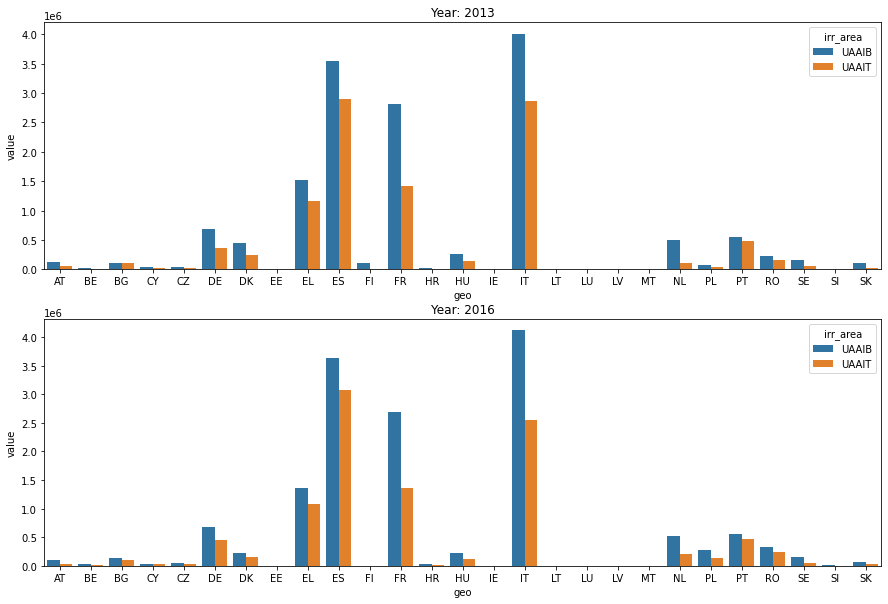

In [287]:
f, ax = plt.subplots(2, 1, figsize = (15, 10))

for i, year in enumerate(irrigation_df_long.Year.unique()):
    
    irrigation_graph = irrigation_df_long[irrigation_df_long['Year'] == year]
    
    sns.barplot(x = 'geo', y = 'value', hue = 'irr_area', data = irrigation_graph, ax = ax[i])
    
    #ax[i].set_yscale('log')
    ax[i].set_title(f'Year: {year}')

In [288]:
irrigation_df_long.head()

,irr_area,geo,Year,value
0,UAAIB,AT,2013,119840.0
1,UAAIB,BE,2013,19180.0
2,UAAIB,BG,2013,115520.0
3,UAAIB,CY,2013,38060.0
4,UAAIB,CZ,2013,34070.0


In [289]:
irrigation_potential = irrigation_df_long[irrigation_df_long.irr_area == 'UAAIB']

In [347]:
irrigation_join = pd.merge(irrigation_df_long, irrigation_potential, on = ['geo', 'Year'], how = 'left', 
                            suffixes = ('_act', '_pot'))

In [348]:
irrigation_join['share'] = irrigation_join.value_act.div(irrigation_join.value_pot).mul(100)


In [349]:
irrigation_join = irrigation_join[irrigation_join['irr_area_act'] == 'UAAIT']

In [350]:
irrigation_join.head()

,irr_area_act,geo,Year,value_act,irr_area_pot,value_pot,share
27,UAAIT,AT,2013,51680.0,UAAIB,119840.0,43.124166
28,UAAIT,BE,2013,5740.0,UAAIB,19180.0,29.927007
29,UAAIT,BG,2013,98670.0,UAAIB,115520.0,85.413781
30,UAAIT,CY,2013,24670.0,UAAIB,38060.0,64.818707
31,UAAIT,CZ,2013,17840.0,UAAIB,34070.0,52.362783


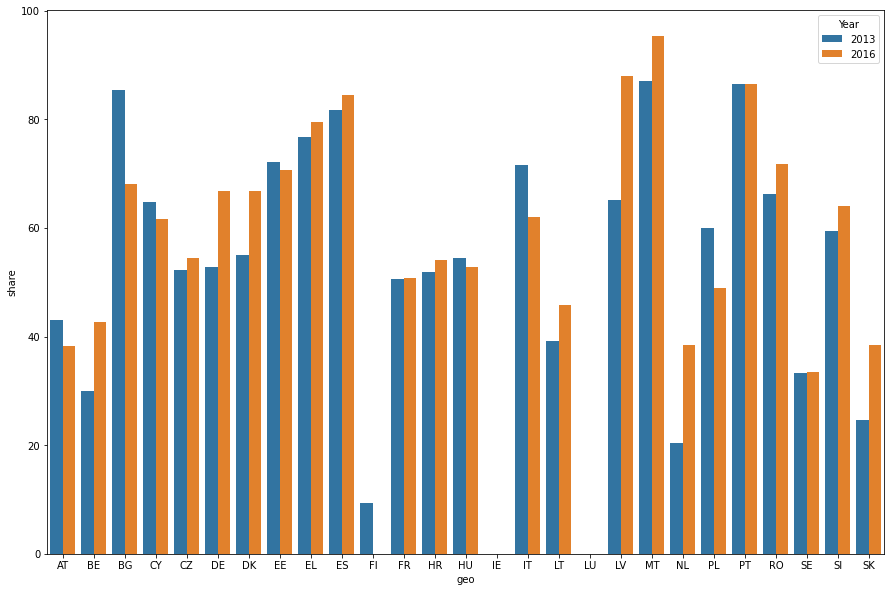

In [351]:
f, ax = plt.subplots(figsize = (15, 10))

sns.barplot(data = irrigation_join, x = 'geo', y = 'share', hue = 'Year', ax = ax)

plt.show()

In [352]:
# As the values are quite similar (statistical test?) and because I've only 2 datapoints, I'm going to average the two
# and convert to categorical data

In [353]:
irrigation_join.head()

,irr_area_act,geo,Year,value_act,irr_area_pot,value_pot,share
27,UAAIT,AT,2013,51680.0,UAAIB,119840.0,43.124166
28,UAAIT,BE,2013,5740.0,UAAIB,19180.0,29.927007
29,UAAIT,BG,2013,98670.0,UAAIB,115520.0,85.413781
30,UAAIT,CY,2013,24670.0,UAAIB,38060.0,64.818707
31,UAAIT,CZ,2013,17840.0,UAAIB,34070.0,52.362783


In [354]:
irrigation_join_mean = irrigation_join.groupby('geo').mean().reset_index().drop(columns = ['value_act', 'value_pot'])

In [355]:
irrigation_join_mean.head()

,geo,share
0,AT,40.704940
1,BE,36.282458
2,BG,76.773631
3,CY,63.203795
4,CZ,53.433300


In [356]:
irrigation_join_mean['irrigation'] = irrigation_join_mean.share.apply(categorical_converter)

In [358]:
irrigation_join_mean.head()

,geo,share,irrigation
0,AT,40.704940,medium
1,BE,36.282458,low
2,BG,76.773631,high
3,CY,63.203795,high
4,CZ,53.433300,medium


In [359]:
# Moving onto legal form

In [382]:
legal_form_df = df_list[3]

In [383]:
legal_form_df.head()

,Unnamed: 0,freq,cons_prd,crops,farmtype,leg_form,agrarea,so_eur,unit,geo\TIME_PERIOD,2016,2020
0,8350045,A,TOTAL,ARA,FT16_SO,HLD_GRP,HA10-19,TOTAL,HA,AT,NaN,430.0
1,8350046,A,TOTAL,ARA,FT16_SO,HLD_GRP,HA10-19,TOTAL,HA,AT11,NaN,70.0
2,8350047,A,TOTAL,ARA,FT16_SO,HLD_GRP,HA10-19,TOTAL,HA,AT12,NaN,170.0
3,8350048,A,TOTAL,ARA,FT16_SO,HLD_GRP,HA10-19,TOTAL,HA,AT21,NaN,NaN
4,8350049,A,TOTAL,ARA,FT16_SO,HLD_GRP,HA10-19,TOTAL,HA,AT22,NaN,NaN


In [384]:
legal_form_df = rename_filter_drop(legal_form_df, 'geo\TIME_PERIOD', 'geo', 'geo', eu27_codes, ['Unnamed: 0', 'freq'])

In [385]:
legal_form_df.head()

,cons_prd,crops,farmtype,leg_form,agrarea,so_eur,unit,geo,2016,2020
0,TOTAL,ARA,FT16_SO,HLD_GRP,HA10-19,TOTAL,HA,AT,NaN,430.0
9,TOTAL,ARA,FT16_SO,HLD_GRP,HA10-19,TOTAL,HA,BG,NaN,NaN
11,TOTAL,ARA,FT16_SO,HLD_GRP,HA10-19,TOTAL,HA,DK,NaN,NaN
14,TOTAL,ARA,FT16_SO,HLD_GRP,HA10-19,TOTAL,HA,ES,NaN,220.0
22,TOTAL,ARA,FT16_SO,HLD_GRP,HA10-19,TOTAL,HA,FI,NaN,6400.0


In [386]:
legal_form_df = legal_form_df[legal_form_df.agrarea == 'TOTAL']

In [387]:
null_share(legal_form_df)

cons_prd     0.000
crops        0.000
farmtype     0.000
leg_form     0.000
agrarea      0.000
so_eur       0.000
unit         0.000
geo          0.000
2016        71.875
2020         3.125
dtype: float64

In [388]:
# There are a huge number of missing values in 2016 so I will drop it and just use 2020
# unless 2016 happens to have a value while 2020 is null, in which case I'll take the 2016 value

In [389]:
legal_form_df['value'] = np.where(legal_form_df['2020'].isnull(), legal_form_df['2016'], legal_form_df['2020'])

In [391]:
# There are slightly fewer missing values in the new 'value' column so it now a mix of 2016 and 2020 data
# I think this is fine for categorical data like legal structure which wouldn't change very much over short periods of time

null_share(legal_form_df)

cons_prd     0.000000
crops        0.000000
farmtype     0.000000
leg_form     0.000000
agrarea      0.000000
so_eur       0.000000
unit         0.000000
geo          0.000000
2016        71.875000
2020         3.125000
value        2.083333
dtype: float64

In [393]:
legal_form_df.head()

,cons_prd,crops,farmtype,leg_form,agrarea,so_eur,unit,geo,2016,2020,value
442,TOTAL,ARA,FT16_SO,HLD_GRP,TOTAL,TOTAL,HA,AT,NaN,11850.0,11850.0
452,TOTAL,ARA,FT16_SO,HLD_GRP,TOTAL,TOTAL,HA,BG,NaN,NaN,NaN
461,TOTAL,ARA,FT16_SO,HLD_GRP,TOTAL,TOTAL,HA,DK,NaN,26960.0,26960.0
467,TOTAL,ARA,FT16_SO,HLD_GRP,TOTAL,TOTAL,HA,ES,NaN,3990.0,3990.0
481,TOTAL,ARA,FT16_SO,HLD_GRP,TOTAL,TOTAL,HA,FI,NaN,47250.0,47250.0


In [397]:
legal_form_total = legal_form_df[legal_form_df.leg_form == 'TOTAL']

In [401]:
legal_form_join = pd.merge(legal_form_df, legal_form_total, 
                           on = ['cons_prd', 'crops', 'farmtype', 'agrarea', 'so_eur', 'unit', 'geo'],
                           how = 'left', suffixes = ['', '_total'])

In [402]:
legal_form_join.head()

,cons_prd,crops,farmtype,leg_form,agrarea,so_eur,unit,geo,2016,2020,value,leg_form_total,2016_total,2020_total,value_total
0,TOTAL,ARA,FT16_SO,HLD_GRP,TOTAL,TOTAL,HA,AT,NaN,11850.0,11850.0,TOTAL,227770.0,227490.0,227490.0
1,TOTAL,ARA,FT16_SO,HLD_GRP,TOTAL,TOTAL,HA,BG,NaN,NaN,NaN,TOTAL,124950.0,241520.0,241520.0
2,TOTAL,ARA,FT16_SO,HLD_GRP,TOTAL,TOTAL,HA,DK,NaN,26960.0,26960.0,TOTAL,320230.0,543830.0,543830.0
3,TOTAL,ARA,FT16_SO,HLD_GRP,TOTAL,TOTAL,HA,ES,NaN,3990.0,3990.0,TOTAL,937310.0,1305930.0,1305930.0
4,TOTAL,ARA,FT16_SO,HLD_GRP,TOTAL,TOTAL,HA,FI,NaN,47250.0,47250.0,TOTAL,320740.0,506480.0,506480.0


In [403]:
legal_form_join['share'] = legal_form_join.value.div(legal_form_join.value_total).mul(100)

In [405]:
legal_form_join = legal_form_join[['leg_form', 'geo', 'share']]

In [409]:
legal_form_join = legal_form_join[legal_form_join.leg_form != 'TOTAL']

In [410]:
legal_form_join.head()

,leg_form,geo,share
0,HLD_GRP,AT,5.209020
1,HLD_GRP,BG,NaN
2,HLD_GRP,DK,4.957432
3,HLD_GRP,ES,0.305529
4,HLD_GRP,FI,9.329095


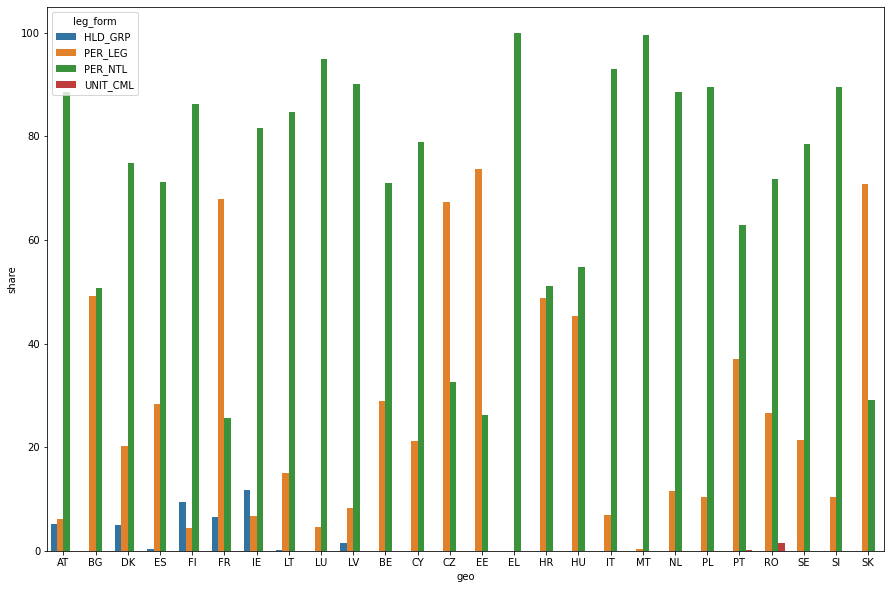

In [415]:
f, ax = plt.subplots(figsize = (15, 10))

sns.barplot(data = legal_form_join, x = 'geo', y = 'share', hue = 'leg_form')

plt.show()

In [416]:
# As these are share which add up to 100%, the NaN values are actuall zeroes so I'll replace them below

In [417]:
legal_form_join.fillna(0, inplace = True)

In [419]:
legal_form_join.head()

,leg_form,geo,share
0,HLD_GRP,AT,5.209020
1,HLD_GRP,BG,0.000000
2,HLD_GRP,DK,4.957432
3,HLD_GRP,ES,0.305529
4,HLD_GRP,FI,9.329095


In [420]:
legal_form_join['legal_form'] = legal_form_join.share.apply(categorical_converter)

In [424]:
legal_form_clean = legal_form_join.pivot(index = 'geo', columns = 'leg_form', values = 'legal_form').reset_index()

In [425]:
legal_form_clean.head()

leg_form,geo,HLD_GRP,PER_LEG,PER_NTL,UNIT_CML
0,AT,very low,very low,very high,NaN
1,BE,NaN,low,high,NaN
2,BG,very low,medium,medium,NaN
3,CY,NaN,low,high,NaN
4,CZ,NaN,high,low,NaN
